# Deep Learning Module

For this module we need to have access to a system with GPU. In this case, I'm using a Google Colab Notebook which offers the possibility to have GPU unit

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git

Cloning into 'clothing-dataset-small'...
remote: Enumerating objects: 3839, done.
remote: Counting objects: 100% (400/400), done.
remote: Compressing objects: 100% (400/400), done.
remote: Total 3839 (delta 9), reused 385 (delta 0), pack-reused 3439 (from 1)
Receiving objects: 100% (3839/3839), 100.58 MiB | 16.08 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [4]:
path = "/content/clothing-dataset-small/train/t-shirt"
name = "5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg"
fullname  = f"{path}/{name}"
fullname

'/content/clothing-dataset-small/train/t-shirt/5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'

In [5]:
from tensorflow.keras.preprocessing.image import load_img

In [28]:
img = load_img(fullname, target_size=(299, 299))

array([[[179, 171,  99],
        [179, 171,  99],
        [181, 173, 101],
        ...,
        [251, 253, 248],
        [251, 253, 248],
        [251, 254, 247]],

       [[188, 179, 112],
        [187, 178, 111],
        [186, 177, 108],
        ...,
        [251, 252, 247],
        [251, 252, 247],
        [251, 252, 246]],

       [[199, 189, 127],
        [200, 190, 128],
        [200, 191, 126],
        ...,
        [250, 251, 245],
        [250, 251, 245],
        [250, 251, 245]],

       ...,

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [183, 135,  25],
        [181, 133,  22],
        [183, 135,  24]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [182, 134,  23],
        [180, 132,  21],
        [182, 134,  23]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [181, 133,  22],
        [179, 131,  20],
        [182, 134,  23]]], dtype=uint8)
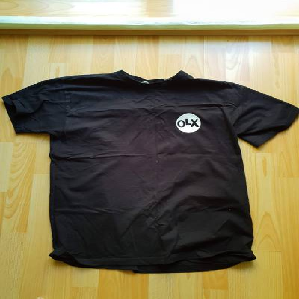

In [29]:
x = np.array(img)
x

We can see that an image can be seen as a numpy array that have three arrays of 150x150 and each of these arrays represent a color channel RGB (Red, Green and Blue)

## Pre-trained convolutional neural networs

- Imagenet dataset: https://www.image-net.org/
- Pre-trained models: https://keras.io/api/applications/

In [8]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [30]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

In [10]:
X = np.array([x])

In [11]:
X.shape

(1, 299, 299, 3)

In [12]:
X = preprocess_input(X)

In [13]:
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


In [14]:
pred.shape

(1, 1000)

In [15]:
decode_predictions(pred)

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


[[('n03595614', 'jersey', 0.68196356),
  ('n02916936', 'bulletproof_vest', 0.038139995),
  ('n04370456', 'sweatshirt', 0.034324735),
  ('n03710637', 'maillot', 0.011354207),
  ('n04525038', 'velvet', 0.0018453562)]]

The reason the prediction points to a *jersey* instead of a t-shirt is because on the classes available, there are no actual t-shirts as class, so the most look alike item on the classes are actualy jerseys

## Transfer Learning
- Reading data with ImageDataGenerator
- Train Xception on smaller images (150x150)

This is better to run it with a GPU

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [18]:
!ls

clothing-dataset-small	sample_data


In [31]:
train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(299, 299),
    batch_size=32)

Found 3068 images belonging to 10 classes.


In [20]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

These Classes represent the type of clothing available on the training dataset, as we can see if we list the training directory

In [ ]:
!ls -l clothing-dataset-small/train

total 256
drwxr-xr-x 2 root root 20480 Nov 30 14:49 dress
drwxr-xr-x 2 root root 12288 Nov 30 14:49 hat
drwxr-xr-x 2 root root 36864 Nov 30 14:49 longsleeve
drwxr-xr-x 2 root root 20480 Nov 30 14:49 outwear
drwxr-xr-x 2 root root 36864 Nov 30 14:49 pants
drwxr-xr-x 2 root root 20480 Nov 30 14:49 shirt
drwxr-xr-x 2 root root 20480 Nov 30 14:49 shoes
drwxr-xr-x 2 root root 20480 Nov 30 14:49 shorts
drwxr-xr-x 2 root root 12288 Nov 30 14:49 skirt
drwxr-xr-x 2 root root 57344 Nov 30 14:49 t-shirt


In [ ]:
X, y = next(train_ds)
X[0]

array([[[ 0.7490196 ,  0.78039217,  0.8039216 ],
        [ 0.7882353 ,  0.81960785,  0.84313726],
        [ 0.7882353 ,  0.81960785,  0.84313726],
        ...,
        [ 0.22352946,  0.2313726 ,  0.10588241],
        [ 0.43529415,  0.4431373 ,  0.30196083],
        [ 0.5686275 ,  0.5764706 ,  0.43529415]],

       [[ 0.654902  ,  0.6862745 ,  0.69411767],
        [ 0.7176471 ,  0.7490196 ,  0.75686276],
        [ 0.64705884,  0.6784314 ,  0.6862745 ],
        ...,
        [ 0.54509807,  0.5529412 ,  0.427451  ],
        [ 0.54509807,  0.5529412 ,  0.41176474],
        [ 0.54509807,  0.5529412 ,  0.41176474]],

       [[ 0.73333335,  0.7647059 ,  0.75686276],
        [ 0.8352941 ,  0.8666667 ,  0.85882354],
        [ 0.7490196 ,  0.78039217,  0.77254903],
        ...,
        [-0.01176471, -0.00392157, -0.12941176],
        [ 0.2313726 ,  0.23921573,  0.09803927],
        [-0.03529412, -0.02745098, -0.16862744]],

       ...,

       [[ 0.20784318,  0.27843142,  0.254902  ],
        [ 0

In [ ]:
y[0:7]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

This is the way to represent a multiclass binary classification. Each row of **y** represents a one-hot encoding for each of the available classes

In this way the first column would represent dress, the second hat and so on until t-shirt on the last column.

Now lets do the same with validation data

In [32]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False)


Found 341 images belonging to 10 classes.


In [33]:
base_model = Xception(
    weights='imagenet',
    include_top=False, # the top in this case represent the Dense Layers which we don't want
    input_shape=(299, 299, 3)
)

base_model.trainable = False #This is because when we train our model we don't want to change our convolutional layers

Now we need to create a new top, meaning a new Dense Layers

In [34]:
inputs = keras.Input(shape=(299, 299, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [35]:
preds = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [36]:
preds.shape

(1, 10)

In [37]:
preds[0]

array([ 0.21272007, -0.20388798,  0.22041155,  0.26324636,  0.3565581 ,
       -0.10910925,  0.16844684,  0.46881828,  0.13746625, -0.07870963],
      dtype=float32)

This prediction is nonsense since we haven't actually train our Dense layer

For this we need an optimizer

In [ ]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

In [ ]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 26s 208ms/step - accuracy: 0.5984 - loss: 1.4880 - val_accuracy: 0.7038 - val_loss: 1.1336
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 27s 83ms/step - accuracy: 0.8360 - loss: 0.5151 - val_accuracy: 0.7713 - val_loss: 0.9507
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.8554 - loss: 0.4521 - val_accuracy: 0.7830 - val_loss: 0.8628
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.9120 - loss: 0.2840 - val_accuracy: 0.8094 - val_loss: 0.7980
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 0.9667 - loss: 0.1045 - val_accuracy: 0.7771 - val_loss: 0.8080
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.9682 - loss: 0.0926 - val_accuracy: 0.8446 - val_loss: 0.7944
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.9781 - loss: 0.0617 - val_accuracy: 0.8035 - val_loss: 0.8806
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - accuracy: 0.9859 - loss: 0.0466 - val_accuracy: 0.8065 - val_loss

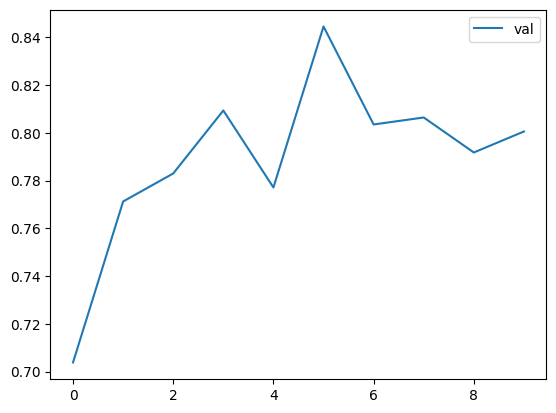

In [ ]:
#plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()

## Adjusting the Learning Rate
- What is the learning rate
  - Remember the book reading analogy. Maybe if we reading a lots of book a year if we want to test our knowledge will be harder than if we read a smaller number of books
  
- Trying different values

In [ ]:
def make_model(learning_rate=0.01):
  base_model = Xception(
      weights='imagenet',
      include_top=False, # the top in this case represent the Dense Layers which we don't want
      input_shape=(150, 150, 3)
  )

  base_model.trainable = False #This is because when we train our model we don't want to change our convolutional layers

  #######################################################
  inputs = keras.Input(shape=(150, 150, 3))

  base = base_model(inputs, training=False)

  vectors = keras.layers.GlobalAveragePooling2D()(base)

  outputs = keras.layers.Dense(10)(vectors)

  model = keras.Model(inputs, outputs)

  #######################################################

  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

  loss = keras.losses.CategoricalCrossentropy(from_logits=True)

  model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
  return model

In [ ]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
  print(lr)
  model = make_model(learning_rate=lr)
  history = model.fit(train_ds, epochs=10, validation_data=val_ds)
  scores[lr] = history.history
  print("\n \n")

0.0001
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 132ms/step - accuracy: 0.1923 - loss: 2.2207 - val_accuracy: 0.4868 - val_loss: 1.6386
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 13s 76ms/step - accuracy: 0.5386 - loss: 1.4862 - val_accuracy: 0.6041 - val_loss: 1.2605
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 76ms/step - accuracy: 0.6220 - loss: 1.2247 - val_accuracy: 0.6686 - val_loss: 1.0678
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 0.6713 - loss: 1.0408 - val_accuracy: 0.7097 - val_loss: 0.9531
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 84ms/step - accuracy: 0.7041 - loss: 0.9275 - val_accuracy: 0.7507 - val_loss: 0.8753
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - accuracy: 0.7250 - loss: 0.8543 - val_accuracy: 0.7595 - val_loss: 0.8242
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - accuracy: 0.7465 - loss: 0.7897 - val_accuracy: 0.7683 - val_loss: 0.7825
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 0.7539 - loss: 0.7529 - val_accurac

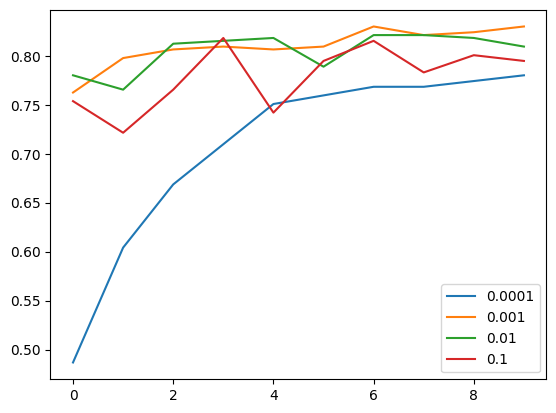

In [ ]:
for lr, hist in scores.items():
  plt.plot(hist['val_accuracy'], label=lr)
  plt.legend()


Lets remove learning rates of 0.1 and 0.0001

In [ ]:
del scores[0.0001]
del scores[0.1]

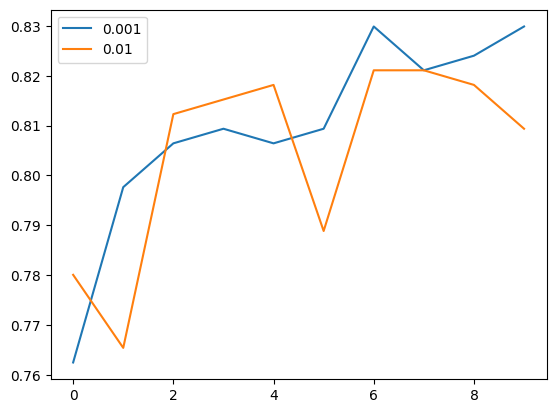

In [ ]:
# And plot again
for lr, hist in scores.items():
  plt.plot(hist['val_accuracy'], label=lr)
  plt.legend()


The best learning rate is then 0.001

## Checkpointing

The idea of checkpointing is to get the best possible combination of epoch for the maximium performance of the model

In [ ]:
model.save_weights('model_v1.weights.h5')

In [ ]:
!ls

clothing-dataset-small	model_v1.weights.h5  sample_data


In [40]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5.keras',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [ ]:
learning_rate = 0.001
model = make_model(learning_rate=learning_rate)
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[checkpoint]
  )


Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 136ms/step - accuracy: 0.5007 - loss: 1.4675 - val_accuracy: 0.7713 - val_loss: 0.7338
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.7687 - loss: 0.6666 - val_accuracy: 0.8035 - val_loss: 0.6354
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - accuracy: 0.8316 - loss: 0.5013 - val_accuracy: 0.8094 - val_loss: 0.6019
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.8637 - loss: 0.4381 - val_accuracy: 0.8182 - val_loss: 0.5894
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - accuracy: 0.8817 - loss: 0.3788 - val_accuracy: 0.8240 - val_loss: 0.5387
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - accuracy: 0.9005 - loss: 0.3302 - val_accuracy: 0.8211 - val_loss: 0.5375
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.9203 - loss: 0.2822 - val_accuracy: 0.8328 - val_loss: 0.5282
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 0.9415 - loss: 0.2454 - val_accuracy: 0.829

In [ ]:
!ls

clothing-dataset-small	xception_v1_01_0.771.h5.keras  xception_v1_04_0.818.h5.keras
model_v1.weights.h5	xception_v1_02_0.804.h5.keras  xception_v1_05_0.824.h5.keras
sample_data		xception_v1_03_0.809.h5.keras  xception_v1_07_0.833.h5.keras


As a result the best performance is obtained with a accuracy of **0.836** we deleted the previous files.

In the next section we are going to add more layers to see if we can improve the accuracy

## Adding more layers

- Adding one inner dense layer
- Experimenting with different sizes of inner layer

In [ ]:
def make_model(learning_rate=0.01, size_inner=100):
  base_model = Xception(
      weights='imagenet',
      include_top=False, # the top in this case represent the Dense Layers which we don't want
      input_shape=(150, 150, 3)
  )

  base_model.trainable = False #This is because when we train our model we don't want to change our convolutional layers

  #######################################################
  inputs = keras.Input(shape=(150, 150, 3))
  base = base_model(inputs, training=False)
  vectors = keras.layers.GlobalAveragePooling2D()(base)

  # now the input of inner would be the vectors and the input of the outputs
  # would be the inner

  inner = keras.layers.Dense(size_inner, activation='relu')(vectors)

  outputs = keras.layers.Dense(10)(inner)

  model = keras.Model(inputs, outputs)

  #######################################################

  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

  loss = keras.losses.CategoricalCrossentropy(from_logits=True)

  model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
  return model

In [ ]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
  print(lr)
  model = make_model(learning_rate=learning_rate)
  history = model.fit(train_ds, epochs=10, validation_data=val_ds)
  scores[size] = history.history
  print("\n \n")

0.01
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 21s 145ms/step - accuracy: 0.5782 - loss: 1.2533 - val_accuracy: 0.7947 - val_loss: 0.6530
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 83ms/step - accuracy: 0.8250 - loss: 0.5055 - val_accuracy: 0.8270 - val_loss: 0.5683
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - accuracy: 0.8821 - loss: 0.3551 - val_accuracy: 0.8182 - val_loss: 0.5839
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - accuracy: 0.9290 - loss: 0.2450 - val_accuracy: 0.8387 - val_loss: 0.5453
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.9560 - loss: 0.1745 - val_accuracy: 0.8035 - val_loss: 0.5803
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - accuracy: 0.9634 - loss: 0.1462 - val_accuracy: 0.8328 - val_loss: 0.5914
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - accuracy: 0.9865 - loss: 0.0879 - val_accuracy: 0.8475 - val_loss: 0.5692
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 75ms/step - accuracy: 0.9947 - loss: 0.0561 - val_accuracy:

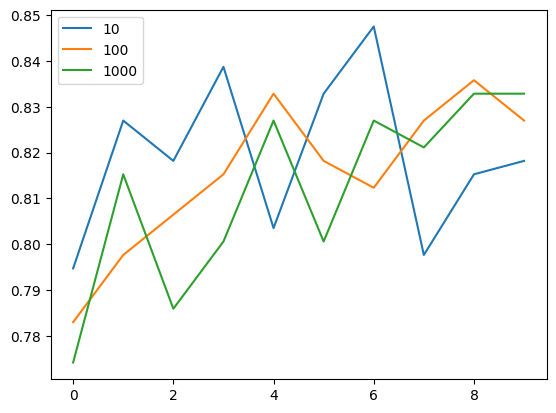

In [ ]:
# And plot again
for size, hist in scores.items():
  plt.plot(hist['val_accuracy'], label=size)
  plt.legend()

As it is possible to see, adding an extra layer didn't provide a significant improvement on the accuracy of the model. But if we want to keep the inner layer, a the size value would be 100, since in most cases give better performance than the other values

## Dropout and Regularization

- Regularizing by freezing a part of the network
- Adding dropout to our model
- Experimenting with different values

To implement this we copy again our function and update it considering the dropout

In [38]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
  base_model = Xception(
      weights='imagenet',
      include_top=False, # the top in this case represent the Dense Layers which we don't want
      input_shape=(299, 299, 3)
  )

  base_model.trainable = False #This is because when we train our model we don't want to change our convolutional layers

  #######################################################
  inputs = keras.Input(shape=(299, 299, 3))
  base = base_model(inputs, training=False)
  vectors = keras.layers.GlobalAveragePooling2D()(base)

  # now the input of inner would be the vectors and the input of the outputs
  # would be the inner

  inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
  drop = keras.layers.Dropout(droprate)(inner)

  outputs = keras.layers.Dense(10)(drop)

  model = keras.Model(inputs, outputs)

  #######################################################

  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

  loss = keras.losses.CategoricalCrossentropy(from_logits=True)

  model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
  return model

In [ ]:
learning_rate = 0.001
size = 100

scores = {}

for dr in [0, 0.1, 0.2, 0.5, 0.7]:
  print(dr)
  model = make_model(learning_rate=learning_rate, size_inner=100, droprate=dr)
  history = model.fit(
      train_ds,
      epochs=30,
      validation_data=val_ds,
      callbacks=[checkpoint]
      )
  scores[dr] = history.history
  print("\n \n")

0
Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 37s 317ms/step - accuracy: 0.6359 - loss: 1.0677 - val_accuracy: 0.8416 - val_loss: 0.4628
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 25s 252ms/step - accuracy: 0.8815 - loss: 0.3552 - val_accuracy: 0.8768 - val_loss: 0.3895
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 40s 249ms/step - accuracy: 0.9077 - loss: 0.2685 - val_accuracy: 0.8798 - val_loss: 0.3716
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 41s 253ms/step - accuracy: 0.9179 - loss: 0.2296 - val_accuracy: 0.8768 - val_loss: 0.3594
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 40s 247ms/step - accuracy: 0.9323 - loss: 0.1845 - val_accuracy: 0.8798 - val_loss: 0.3491
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 25s 251ms/step - accuracy: 0.9598 - loss: 0.1408 - val_accuracy: 0.8739 - val_loss: 0.3879
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 25s 245ms/step - accuracy: 0.9692 - loss: 0.1151 - val_accuracy: 0.8592 - val_loss: 0.4273
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 24s 243ms/step - accuracy: 0.9656 - loss: 0.1119 - val_ac

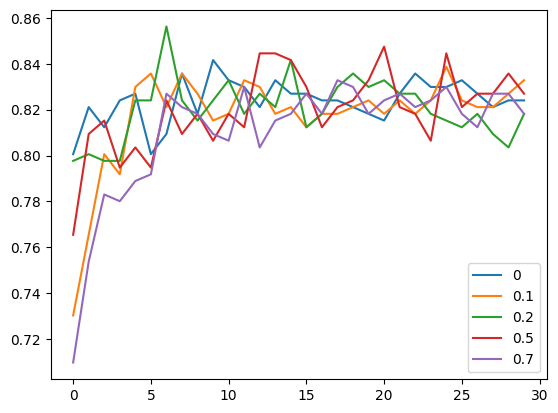

In [ ]:
# And plot again
for dr, hist in scores.items():
  plt.plot(hist['val_accuracy'], label=dr)
  plt.legend()

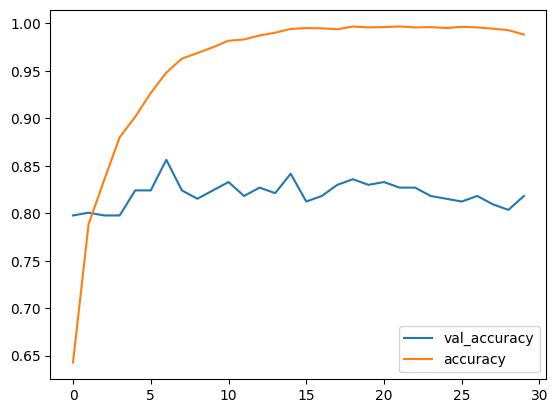

In [ ]:
# And plot again
hist = scores[0.2]
plt.plot(hist['val_accuracy'], label='val_accuracy')
plt.plot(hist['accuracy'], label='accuracy')
plt.legend()

It seems that the best droprate rate would be **0.2**

## Data Augmentation

Additional to Dropout there is another way to make sure the model doesn't consider an specific consider specific parts of an image as the main feature (like a logo in a t-shirt), so, with that in mind, we can also consider other methods that for example flip the image vertcally or horizontally to to transform the data we already have.

This is called Data Augmentation

### Possible Transformations
- Flip (vertical or horizontal)
- Rotation
- Shift
- Shear
- Zoom in/out. It can also be done in vertical or horizontal axis
- Brightness/Contrast
- Black patch

So in this module we will explore:
- Try different data augmentations
- Train a model with augmentations
- How to select data augmentations
  - User your own judgement
  - Look at the dataset. What kind of variations are there?
    - Are there objectos always centered? => rotate, shift
  - Tune it as a hyperparameter
    - Train it for 10-20 epochs. Is it better?
      - Yes? Use it
      - No? Don't use it. Yor could try for more epochs


In [ ]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    cval=0.0,
    vertical_flip=True,
)

# We only apply this augmentation on training. we should not change the validation immages

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [ ]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 35s 282ms/step - accuracy: 0.1548 - loss: 2.6822 - val_accuracy: 0.4018 - val_loss: 1.8156
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 34s 227ms/step - accuracy: 0.3913 - loss: 1.7991 - val_accuracy: 0.5836 - val_loss: 1.2632
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 23s 224ms/step - accuracy: 0.5464 - loss: 1.3852 - val_accuracy: 0.6100 - val_loss: 1.0829
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 41s 225ms/step - accuracy: 0.5760 - loss: 1.2686 - val_accuracy: 0.6745 - val_loss: 0.9301
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 23s 224ms/step - accuracy: 0.6447 - loss: 1.0521 - val_accuracy: 0.7126 - val_loss: 0.8732
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 215ms/step - accuracy: 0.6004 - loss: 1.1666 - val_accuracy: 0.7155 - val_loss: 0.8831
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 24s 228ms/step - accuracy: 0.6579 - loss: 1.0245 - val_accuracy: 0.7449 - val_loss: 0.7989
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 39s 215ms/step - accuracy: 0.6616 - loss: 0.9999 - val_accuracy: 0.785